In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [53]:
df_result = pd.read_csv("result`data.csv")

In [54]:
df_result.head()

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
0,4,2,2,1.00,14.05,0.0,combo,defeats,per goal,2024-08-01
1,4,3,1,1.00,7.81,0.0,combo,defeats,per goal,2024-08-01
2,3,1,2,1.00,15.77,0.0,combo,defeats,per goal,2024-08-01
3,5,3,2,1.00,16.88,0.0,combo,defeats,per goal,2024-08-01
4,4,4,0,1.57,8.61,0.0,combo,win,per goal,2024-08-01


In [55]:
df_result.tail()

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
218,2,0,2,0.5,21.00,0.0,combo,defeats,per win,2024-08-19
219,1,0,1,0.5,6.50,0.0,unique,defeats,per win,2024-08-19
220,2,1,1,0.5,13.65,0.0,combo,defeats,per win,2024-08-19
221,1,0,1,0.7,4.75,0.0,unique,defeats,per win,2024-08-19
222,1,1,0,0.5,0.78,0.0,unique,win,per goal,2024-08-19


In [56]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
card_number       223 non-null int64
number_win        223 non-null int64
number_defeats    223 non-null int64
bet_value         223 non-null float64
win_value         223 non-null float64
cashout           223 non-null float64
card_type         223 non-null object
result            218 non-null object
bet_type          223 non-null object
date              223 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 17.5+ KB


In [57]:
df_result.describe()

,card_number,number_win,number_defeats,bet_value,win_value,cashout
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,3.556054,2.143498,1.417040,0.894978,13.604888,0.346547
std,1.748937,1.634934,0.991439,0.473605,19.603527,1.256462
min,1.000000,0.000000,0.000000,0.500000,0.530000,0.000000
25%,2.000000,1.000000,1.000000,0.500000,4.310000,0.000000
50%,3.000000,2.000000,1.000000,0.950000,8.740000,0.000000
75%,4.000000,3.000000,2.000000,1.000000,15.925000,0.000000
max,11.000000,9.000000,4.000000,2.810000,209.000000,10.920000


In [58]:
df_result.columns

Index(['card_number', 'number_win', 'number_defeats', 'bet_value', 'win_value',
       'cashout', 'card_type', 'result', 'bet_type', 'date'],
      dtype='object')

In [59]:
df_result['card_number'].head(2)

0    4
1    4
Name: card_number, dtype: int64

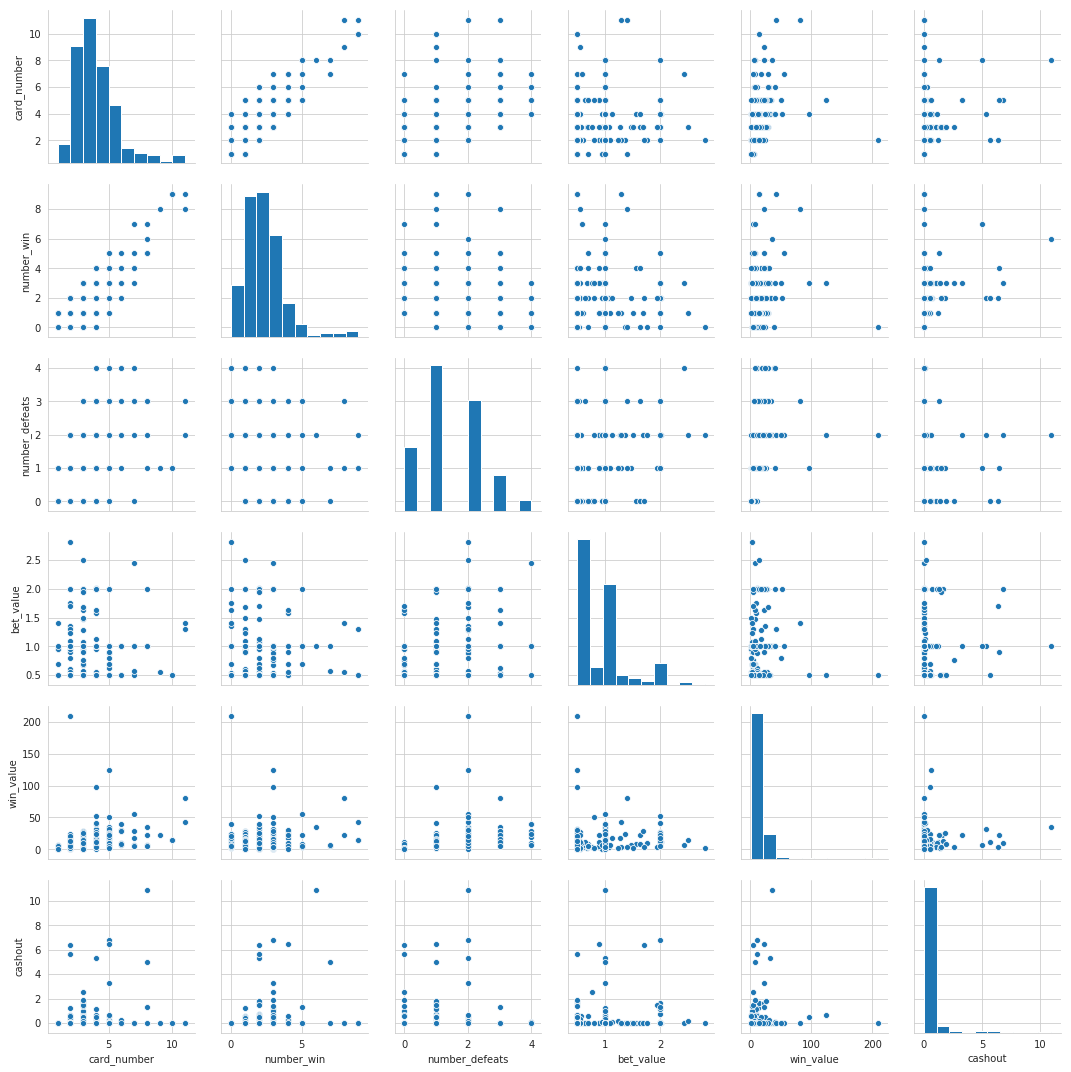

In [60]:
sns.pairplot(df_result)

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


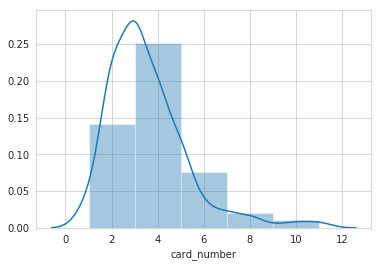

In [61]:
sns.distplot(df_result['card_number'], kde=True, bins=5)

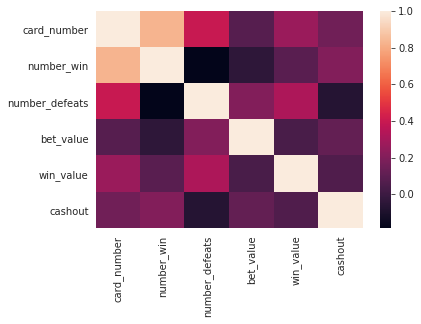

In [62]:
sns.heatmap(df_result.corr())

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


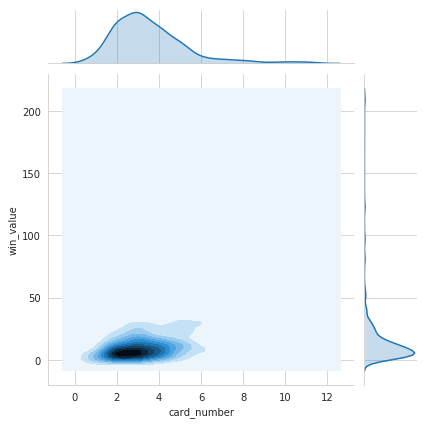

In [63]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind='kde')

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


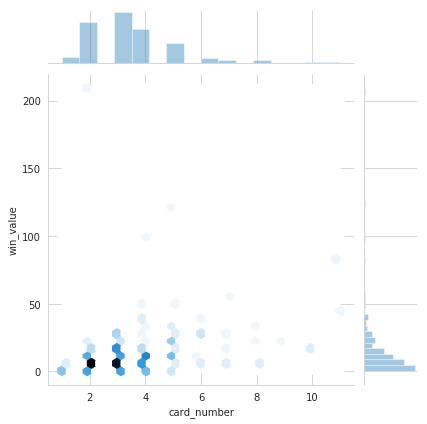

In [64]:
sns.jointplot(x='card_number', y='win_value', data=df_result, kind = "hex")

/home/iva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/iva/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


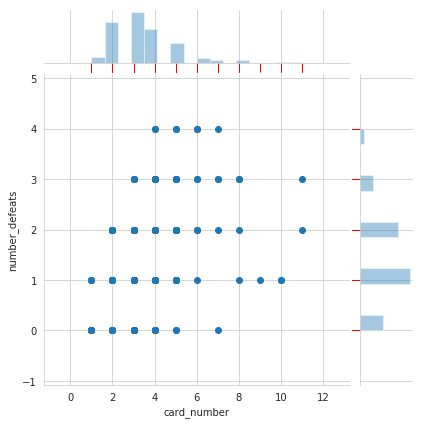

In [65]:
g = sns.jointplot(data=df_result, x='card_number', y='number_defeats')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

## K Means

In [66]:
df_means=df_result.iloc[:,[1,4]].values
df_means

array([[  2.  ,  14.05],
       [  3.  ,   7.81],
       [  1.  ,  15.77],
       [  3.  ,  16.88],
       [  4.  ,   8.61],
       [  2.  ,  51.74],
       [  3.  ,  23.22],
       [  2.  ,   5.77],
       [  3.  ,  13.06],
       [  2.  ,  10.62],
       [  3.  ,  10.99],
       [  3.  ,   6.48],
       [  1.  ,  12.12],
       [  3.  ,  11.62],
       [  0.  ,   8.74],
       [  0.  ,  23.8 ],
       [  2.  ,   7.6 ],
       [  1.  ,   7.91],
       [  1.  ,   6.93],
       [  2.  ,  32.12],
       [  1.  ,  29.42],
       [  6.  ,  35.02],
       [  2.  ,  34.31],
       [  1.  ,  10.44],
       [  1.  ,   3.36],
       [  4.  ,  29.22],
       [  0.  ,  12.  ],
       [  1.  ,   3.28],
       [  2.  ,  14.58],
       [  2.  ,   9.79],
       [  1.  ,  27.96],
       [  1.  ,  10.19],
       [  2.  ,  17.85],
       [  0.  ,  21.93],
       [  4.  ,   7.75],
       [  5.  ,   4.63],
       [  2.  ,   1.64],
       [  3.  ,   2.94],
       [  2.  ,   6.8 ],
       [  3.  ,   7.03],


In [67]:
list_rcn = df_result[df_result.columns[0]].tolist()
array_rcn = np.array(list_rcn)
array_rcn

array([ 4,  4,  3,  5,  4,  4,  5,  3,  5,  6,  5,  6,  4,  4,  2,  2,  3,
        3,  3,  4,  5,  8,  5,  3,  2,  7,  2,  2,  3,  3,  3,  3,  3,  3,
        4,  5,  3,  4,  4,  7,  2,  1,  1,  1,  3,  4,  3,  3,  4,  2,  3,
        4,  2,  4,  4,  4,  3,  3,  3, 10,  4, 10,  3,  2,  5,  3,  4,  4,
        2,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  4,  4,  5,  3,  3,  7,
        5,  5,  3,  7,  3,  4,  4,  3,  6,  3,  3,  3,  5,  3,  5,  3,  4,
        3,  2,  7,  4,  6,  4,  5,  2,  5,  4,  2,  2,  6,  2,  3,  4,  4,
        3,  5,  5,  8,  3,  3,  4,  2,  2,  2,  3,  3,  3,  4,  3,  2,  2,
        2,  2,  3,  3,  3,  5,  3,  5,  1,  3,  5,  4,  2,  3,  3,  5,  2,
        3,  2,  3,  5,  3,  3,  4,  3,  3,  3,  6,  2,  4,  4,  3,  3,  3,
        4,  5,  4,  2,  2,  1,  9,  3,  6, 11, 11,  2,  8,  5,  2,  4,  5,
        4,  5,  4,  5,  4,  2,  4,  2,  4,  4,  3,  3,  2,  4,  8,  2,  2,
        2,  2,  2,  2,  2,  1,  2,  2,  2,  3,  2,  2,  2,  3,  2,  1,  2,
        1,  1])

In [68]:
list_rw = df_result[df_result.columns[1]].tolist()
array_rw = np.array(list_rw)
array_rw

array([2, 3, 1, 3, 4, 2, 3, 2, 3, 2, 3, 3, 1, 3, 0, 0, 2, 1, 1, 2, 1, 6,
       2, 1, 1, 4, 0, 1, 2, 2, 1, 1, 2, 0, 4, 5, 2, 3, 2, 3, 1, 1, 1, 1,
       3, 2, 2, 3, 3, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 9, 2, 9, 0, 0, 2, 1,
       3, 3, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 3, 3, 2, 2, 4, 3, 2, 1,
       7, 2, 2, 4, 2, 4, 2, 1, 0, 4, 1, 2, 1, 3, 1, 0, 5, 0, 2, 1, 3, 0,
       3, 2, 1, 1, 5, 2, 2, 3, 3, 2, 3, 4, 7, 3, 2, 3, 0, 2, 1, 3, 3, 2,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 5, 3, 2, 1, 3, 4, 2, 2, 3, 2, 1, 2, 1,
       2, 1, 4, 2, 2, 3, 3, 2, 3, 4, 1, 3, 2, 2, 2, 3, 4, 4, 2, 2, 1, 1,
       8, 1, 3, 9, 8, 1, 5, 4, 2, 1, 3, 4, 3, 0, 3, 3, 2, 3, 2, 2, 3, 1,
       2, 0, 1, 5, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 0, 1])

In [69]:
list_rwv = df_result[df_result.columns[4]].tolist()
array_rwv = np.array(list_rwv)
array_rwv

array([ 14.05,   7.81,  15.77,  16.88,   8.61,  51.74,  23.22,   5.77,
        13.06,  10.62,  10.99,   6.48,  12.12,  11.62,   8.74,  23.8 ,
         7.6 ,   7.91,   6.93,  32.12,  29.42,  35.02,  34.31,  10.44,
         3.36,  29.22,  12.  ,   3.28,  14.58,   9.79,  27.96,  10.19,
        17.85,  21.93,   7.75,   4.63,   1.64,   2.94,   6.8 ,   7.03,
         5.04,   1.24,   1.19,   1.27,   7.08,   5.65,   3.42,   2.04,
         4.46,   4.62,   3.69,   2.31,   3.68,   6.32,   6.86,   4.75,
        17.12,   4.22,   5.14,  14.35,  13.84,  14.35,   7.86,   4.65,
        22.46,  18.03,  18.03,  11.48,   8.12,  13.3 ,  19.98,  10.77,
        29.24,   7.69,   9.87,   8.1 ,  11.2 ,  11.31,  12.32,  26.86,
         6.3 ,  32.26,   7.66,   3.09,  17.07,  11.04,  11.93,  12.36,
         4.89,  10.49,  17.9 ,   2.53,   6.3 ,  29.38,   2.59,  17.02,
        15.43,  10.03,  16.07,  24.1 ,  26.1 ,   1.72,  27.84,   6.82,
        55.72,  38.98,  39.67,  12.74,  26.36,   2.4 ,  10.34,  10.83,
      

In [70]:
list_result=[df_means,array_rcn]
list_result[0][:,0]

array([2., 3., 1., 3., 4., 2., 3., 2., 3., 2., 3., 3., 1., 3., 0., 0., 2.,
       1., 1., 2., 1., 6., 2., 1., 1., 4., 0., 1., 2., 2., 1., 1., 2., 0.,
       4., 5., 2., 3., 2., 3., 1., 1., 1., 1., 3., 2., 2., 3., 3., 1., 2.,
       3., 1., 1., 3., 2., 1., 1., 1., 9., 2., 9., 0., 0., 2., 1., 3., 3.,
       2., 0., 2., 1., 1., 2., 0., 2., 1., 2., 1., 1., 3., 3., 2., 2., 4.,
       3., 2., 1., 7., 2., 2., 4., 2., 4., 2., 1., 0., 4., 1., 2., 1., 3.,
       1., 0., 5., 0., 2., 1., 3., 0., 3., 2., 1., 1., 5., 2., 2., 3., 3.,
       2., 3., 4., 7., 3., 2., 3., 0., 2., 1., 3., 3., 2., 3., 1., 1., 2.,
       1., 1., 2., 2., 2., 5., 3., 2., 1., 3., 4., 2., 2., 3., 2., 1., 2.,
       1., 2., 1., 4., 2., 2., 3., 3., 2., 3., 4., 1., 3., 2., 2., 2., 3.,
       4., 4., 2., 2., 1., 1., 8., 1., 3., 9., 8., 1., 5., 4., 2., 1., 3.,
       4., 3., 0., 3., 3., 2., 3., 2., 2., 3., 1., 2., 0., 1., 5., 0., 1.,
       0., 1., 0., 1., 0., 0., 2., 1., 1., 1., 1., 1., 1., 2., 0., 0., 1.,
       0., 1.])

In [71]:
list_result[0][:,1]

array([ 14.05,   7.81,  15.77,  16.88,   8.61,  51.74,  23.22,   5.77,
        13.06,  10.62,  10.99,   6.48,  12.12,  11.62,   8.74,  23.8 ,
         7.6 ,   7.91,   6.93,  32.12,  29.42,  35.02,  34.31,  10.44,
         3.36,  29.22,  12.  ,   3.28,  14.58,   9.79,  27.96,  10.19,
        17.85,  21.93,   7.75,   4.63,   1.64,   2.94,   6.8 ,   7.03,
         5.04,   1.24,   1.19,   1.27,   7.08,   5.65,   3.42,   2.04,
         4.46,   4.62,   3.69,   2.31,   3.68,   6.32,   6.86,   4.75,
        17.12,   4.22,   5.14,  14.35,  13.84,  14.35,   7.86,   4.65,
        22.46,  18.03,  18.03,  11.48,   8.12,  13.3 ,  19.98,  10.77,
        29.24,   7.69,   9.87,   8.1 ,  11.2 ,  11.31,  12.32,  26.86,
         6.3 ,  32.26,   7.66,   3.09,  17.07,  11.04,  11.93,  12.36,
         4.89,  10.49,  17.9 ,   2.53,   6.3 ,  29.38,   2.59,  17.02,
        15.43,  10.03,  16.07,  24.1 ,  26.1 ,   1.72,  27.84,   6.82,
        55.72,  38.98,  39.67,  12.74,  26.36,   2.4 ,  10.34,  10.83,
      

In [72]:
list_result[1]

array([ 4,  4,  3,  5,  4,  4,  5,  3,  5,  6,  5,  6,  4,  4,  2,  2,  3,
        3,  3,  4,  5,  8,  5,  3,  2,  7,  2,  2,  3,  3,  3,  3,  3,  3,
        4,  5,  3,  4,  4,  7,  2,  1,  1,  1,  3,  4,  3,  3,  4,  2,  3,
        4,  2,  4,  4,  4,  3,  3,  3, 10,  4, 10,  3,  2,  5,  3,  4,  4,
        2,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  4,  4,  5,  3,  3,  7,
        5,  5,  3,  7,  3,  4,  4,  3,  6,  3,  3,  3,  5,  3,  5,  3,  4,
        3,  2,  7,  4,  6,  4,  5,  2,  5,  4,  2,  2,  6,  2,  3,  4,  4,
        3,  5,  5,  8,  3,  3,  4,  2,  2,  2,  3,  3,  3,  4,  3,  2,  2,
        2,  2,  3,  3,  3,  5,  3,  5,  1,  3,  5,  4,  2,  3,  3,  5,  2,
        3,  2,  3,  5,  3,  3,  4,  3,  3,  3,  6,  2,  4,  4,  3,  3,  3,
        4,  5,  4,  2,  2,  1,  9,  3,  6, 11, 11,  2,  8,  5,  2,  4,  5,
        4,  5,  4,  5,  4,  2,  4,  2,  4,  4,  3,  3,  2,  4,  8,  2,  2,
        2,  2,  2,  2,  2,  1,  2,  2,  2,  3,  2,  2,  2,  3,  2,  1,  2,
        1,  1])

In [73]:
from sklearn.datasets import make_blobs

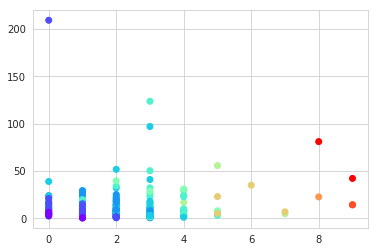

In [74]:
plt.scatter(list_result[0][:,0],list_result[0][:,1],c=list_result[1],cmap='rainbow')

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=3)

In [77]:
kmeans.fit(df_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
kmeans.cluster_centers_

array([[  2.02777778,   7.6355    ],
       [  2.        , 143.16333333],
       [  2.675     ,  30.75025   ]])

In [79]:
kmeans.labels_

array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0], dtype=int32)

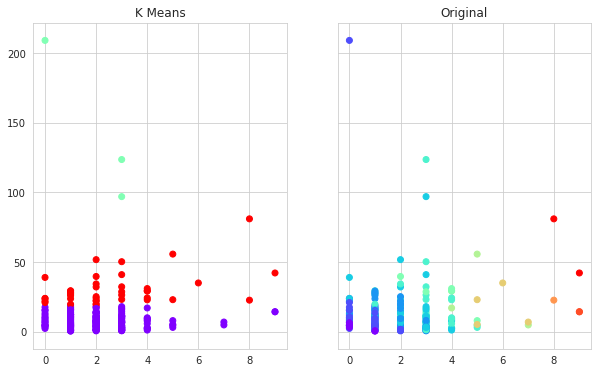

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(list_result[0][:,0],list_result[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(list_result[0][:,0],list_result[0][:,1],c=list_result[1],cmap='rainbow')

In [81]:
df_result.head(1)

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
0,4,2,2,1.0,14.05,0.0,combo,defeats,per goal,2024-08-01


In [82]:
filter_result = np.where((df_result['result'] == 'win') | (df_result['result'] == 'defeats'))

In [83]:
filter_result 

(array([  0,   1,   2,   3,   4,   5,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  20,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182

In [84]:
result=df_result.loc[filter_result]
result.head()

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
0,4,2,2,1.00,14.05,0.0,combo,defeats,per goal,2024-08-01
1,4,3,1,1.00,7.81,0.0,combo,defeats,per goal,2024-08-01
2,3,1,2,1.00,15.77,0.0,combo,defeats,per goal,2024-08-01
3,5,3,2,1.00,16.88,0.0,combo,defeats,per goal,2024-08-01
4,4,4,0,1.57,8.61,0.0,combo,win,per goal,2024-08-01


/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


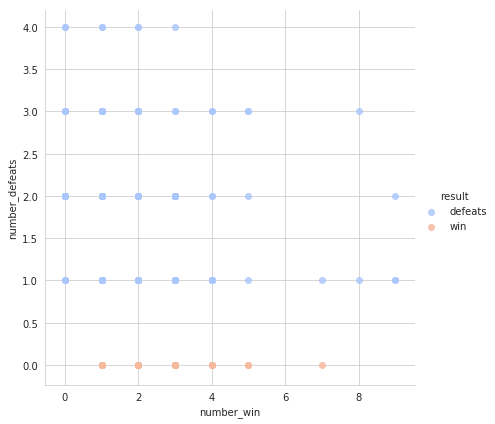

In [85]:
sns.set_style('whitegrid')
sns.lmplot('number_win','number_defeats',data=result, hue='result',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


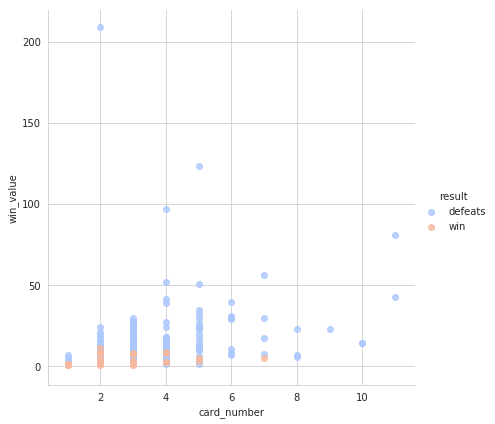

In [86]:
sns.set_style('whitegrid')
sns.lmplot('card_number','win_value',data=result, hue='result',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [87]:
filter_win = np.where((df_result['result'] == 'win'))

In [88]:
result_win=df_result.loc[filter_win]
result_win.head()

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
4,4,4,0,1.57,8.61,0.0,combo,win,per goal,2024-08-01
34,4,4,0,1.63,7.75,0.0,combo,win,per win,2024-08-31
35,5,5,0,1.00,4.63,0.0,combo,win,per win,2024-08-31
41,1,1,0,0.95,1.24,0.0,unique,win,per win,2024-08-31
42,1,1,0,0.95,1.19,0.0,unique,win,per win,2024-08-31


/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


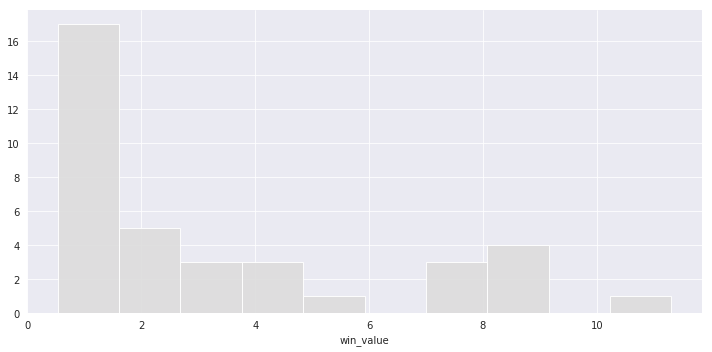

In [89]:
sns.set_style('darkgrid')
g = sns.FacetGrid(result_win,hue="result",palette='coolwarm',size=5,aspect=2)
g = g.map(plt.hist,'win_value',bins=10,alpha=0.9)

In [90]:
filter_defeats = np.where((df_result['result'] == 'defeats'))
result_defeats=df_result.loc[filter_defeats]
result_defeats.head()

,card_number,number_win,number_defeats,bet_value,win_value,cashout,card_type,result,bet_type,date
0,4,2,2,1.0,14.05,0.0,combo,defeats,per goal,2024-08-01
1,4,3,1,1.0,7.81,0.0,combo,defeats,per goal,2024-08-01
2,3,1,2,1.0,15.77,0.0,combo,defeats,per goal,2024-08-01
3,5,3,2,1.0,16.88,0.0,combo,defeats,per goal,2024-08-01
5,4,2,2,2.0,51.74,0.0,combo,defeats,per goal,2024-08-01


/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


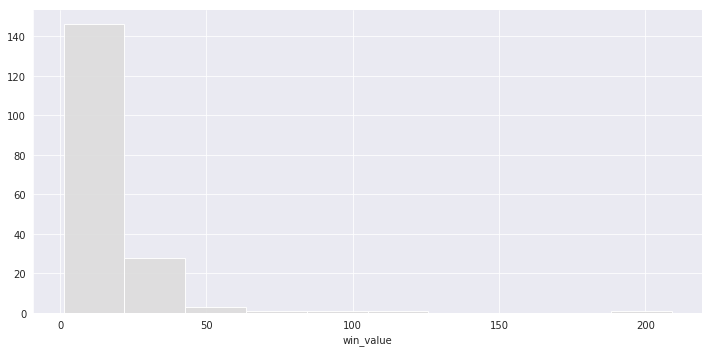

In [91]:
sns.set_style('darkgrid')
g = sns.FacetGrid(result_defeats,hue="result",palette='coolwarm',size=5,aspect=2)
g = g.map(plt.hist,'win_value',bins=10,alpha=0.9)

/home/iva/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


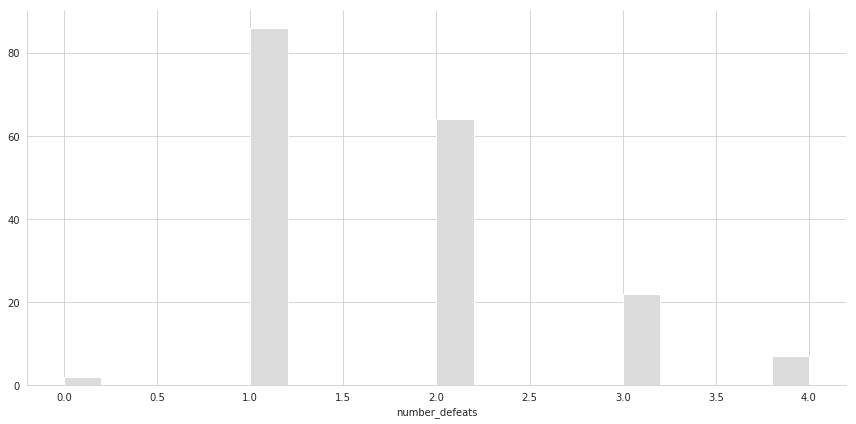

In [92]:
sns.set_style('whitegrid')
g = sns.FacetGrid(result_defeats,hue="result",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'number_defeats',bins=20,alpha=1)